In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv('/content/data.csv', encoding='latin1')  # or encoding='ISO-8859-1'

df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.shape
#to check the shape of data


(72736, 13)

In [8]:
df.info()

#to check column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72736 entries, 0 to 72735
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     45921 non-null  float64
 1   sampling_date                72736 non-null  object 
 2   state                        72735 non-null  object 
 3   location                     72735 non-null  object 
 4   agency                       44678 non-null  object 
 5   type                         71710 non-null  object 
 6   so2                          66407 non-null  float64
 7   no2                          70189 non-null  float64
 8   rspm                         66530 non-null  float64
 9   spm                          34803 non-null  float64
 10  location_monitoring_station  67915 non-null  object 
 11  pm2_5                        87 non-null     float64
 12  date                         72735 non-null  object 
dtypes: float64(6), o

In [ ]:
df.isnull().sum()
# to chech how many columns in each Column

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149481
type,5393
so2,34646
no2,16233
rspm,40222
spm,237387


In [ ]:
df.describe()
#the mean, min, max, and standard deviation for each numeric column.

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


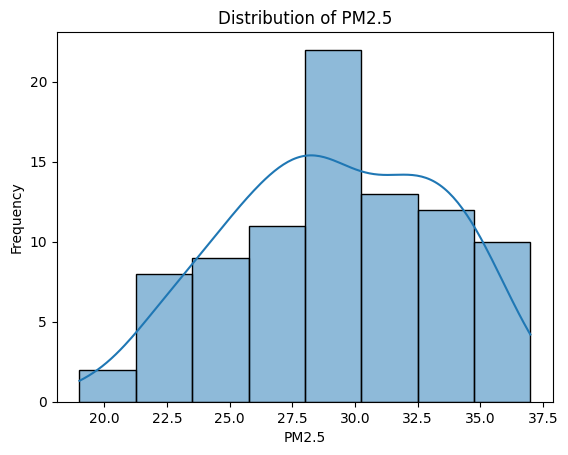

In [11]:
# Visualize the distribution of PM2.5
sns.histplot(df['pm2_5'], kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()


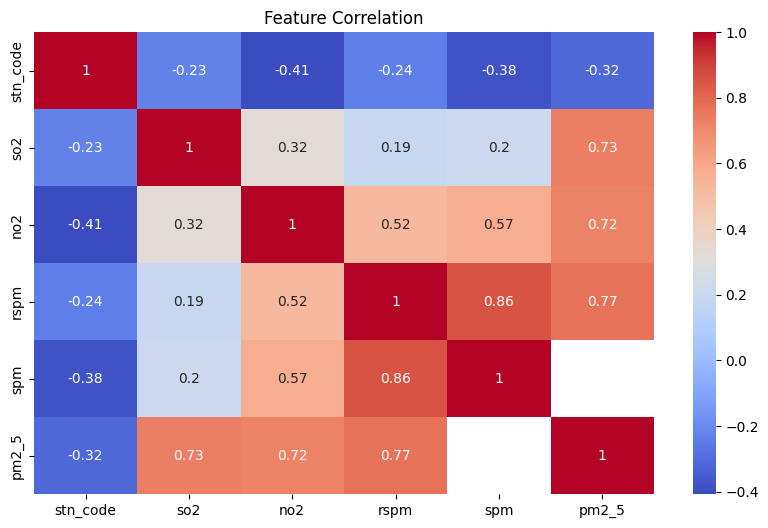

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Create a correlation heatmap for numeric columns only
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()



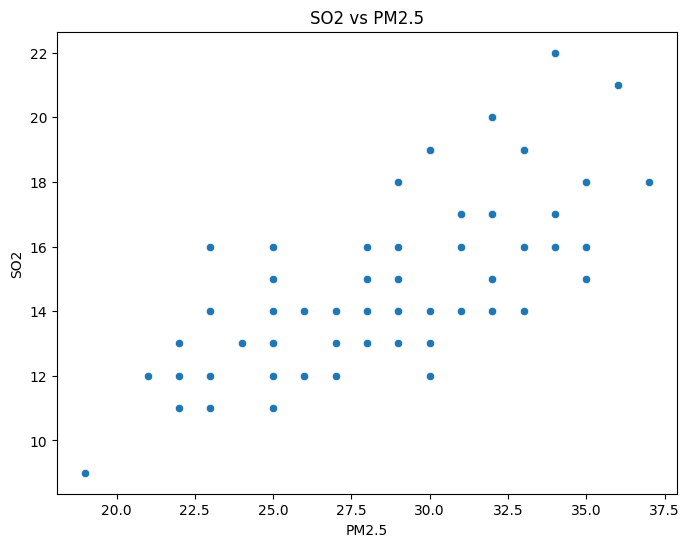

In [13]:
# Scatter plot of AQI vs PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pm2_5'], y=df['so2'])  # You can change the second feature to 'AQI' if available
plt.title('SO2 vs PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('SO2')
plt.show()


In [14]:
# Check numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(numeric_columns)


Index(['stn_code', 'so2', 'no2', 'rspm', 'spm', 'pm2_5'], dtype='object')


In [15]:
# Fill missing values for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [16]:
# Fill missing values in non-numeric columns with the mode (most frequent value)
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
for column in non_numeric_columns:
    df[column] = df[column].fillna(df[column].mode()[0])


In [17]:
# Check if any missing values remain
df.isnull().sum()


,0
stn_code,0
sampling_date,0
state,0
location,0
agency,0
type,0
so2,0
no2,0
rspm,0
spm,0


In [18]:
# Drop unnecessary columns
df = df.drop(['stn_code', 'location', 'agency'], axis=1)


In [21]:
df.head()


,sampling_date,state,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,February - M021990,Andhra Pradesh,"Residential, Rural and other Areas",4.8,17.4,98.977851,230.565227,"Head Office, Bamunimaidan, Guwahati",29.183908,1990-02-01
1,February - M021990,Andhra Pradesh,Industrial Area,3.1,7.0,98.977851,230.565227,"Head Office, Bamunimaidan, Guwahati",29.183908,1990-02-01
2,February - M021990,Andhra Pradesh,"Residential, Rural and other Areas",6.2,28.5,98.977851,230.565227,"Head Office, Bamunimaidan, Guwahati",29.183908,1990-02-01
3,March - M031990,Andhra Pradesh,"Residential, Rural and other Areas",6.3,14.7,98.977851,230.565227,"Head Office, Bamunimaidan, Guwahati",29.183908,1990-03-01
4,March - M031990,Andhra Pradesh,Industrial Area,4.7,7.5,98.977851,230.565227,"Head Office, Bamunimaidan, Guwahati",29.183908,1990-03-01


In [22]:
# Drop unnecessary columns (adjust based on your dataset)
df = df.drop(['sampling_date', 'state', 'type', 'location_monitoring_station', 'date'], axis=1)


In [23]:
# Check remaining columns
print(df.columns)


Index(['so2', 'no2', 'rspm', 'spm', 'pm2_5'], dtype='object')


In [24]:
# Set the target variable (AQI) and features
X = df.drop('pm2_5', axis=1)  # All columns except pm2_5, which is your target
y = df['pm2_5']  # Target column


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model with training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared (goodness of fit)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.02940698624907783
R-squared (R²): 0.00013616282601736085


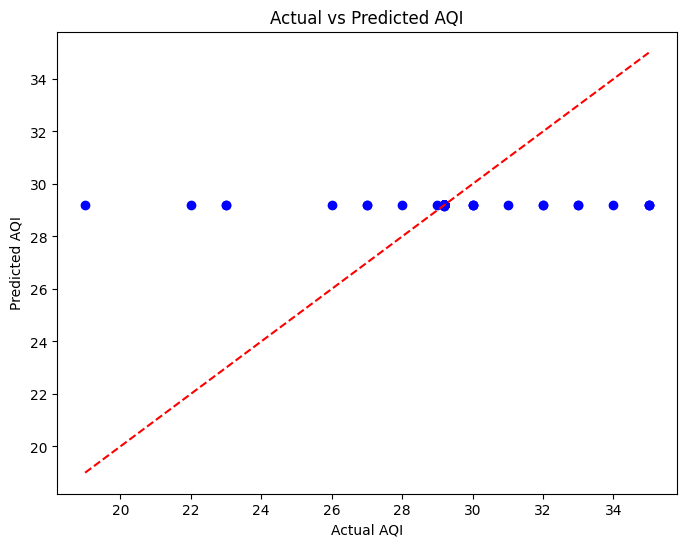

In [27]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.02907745361945551
R-squared (Random Forest): 0.011340567001863144


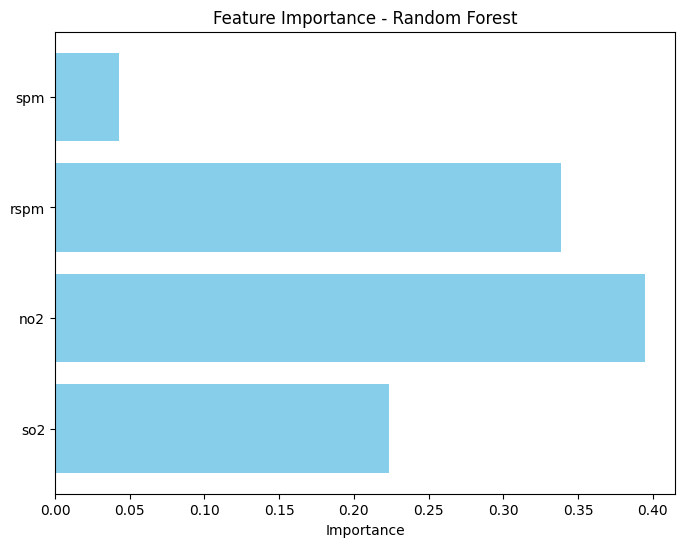

In [29]:
# Re-fit if needed
model_rf.fit(X_train, y_train)

# Get feature importances
importances = model_rf.feature_importances_

# Plot again
plt.figure(figsize=(8, 6))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()


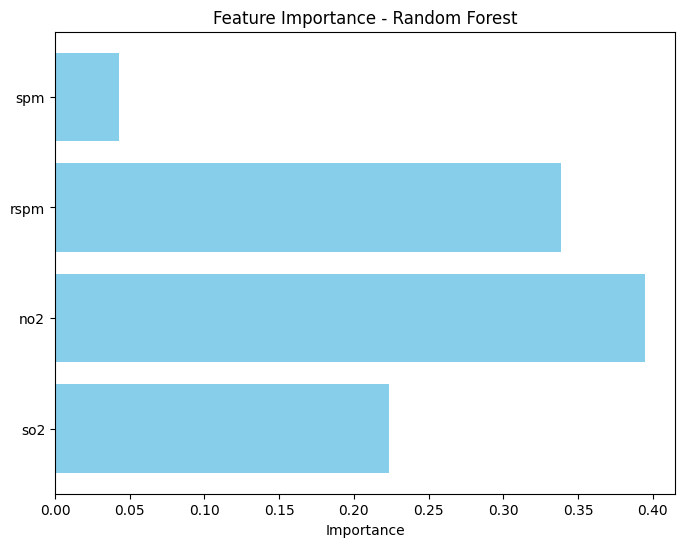

In [30]:
# Get feature importances
feature_importances = model_rf.feature_importances_

# Visualize them
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()
